In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score


In [14]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition (1).csv")
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


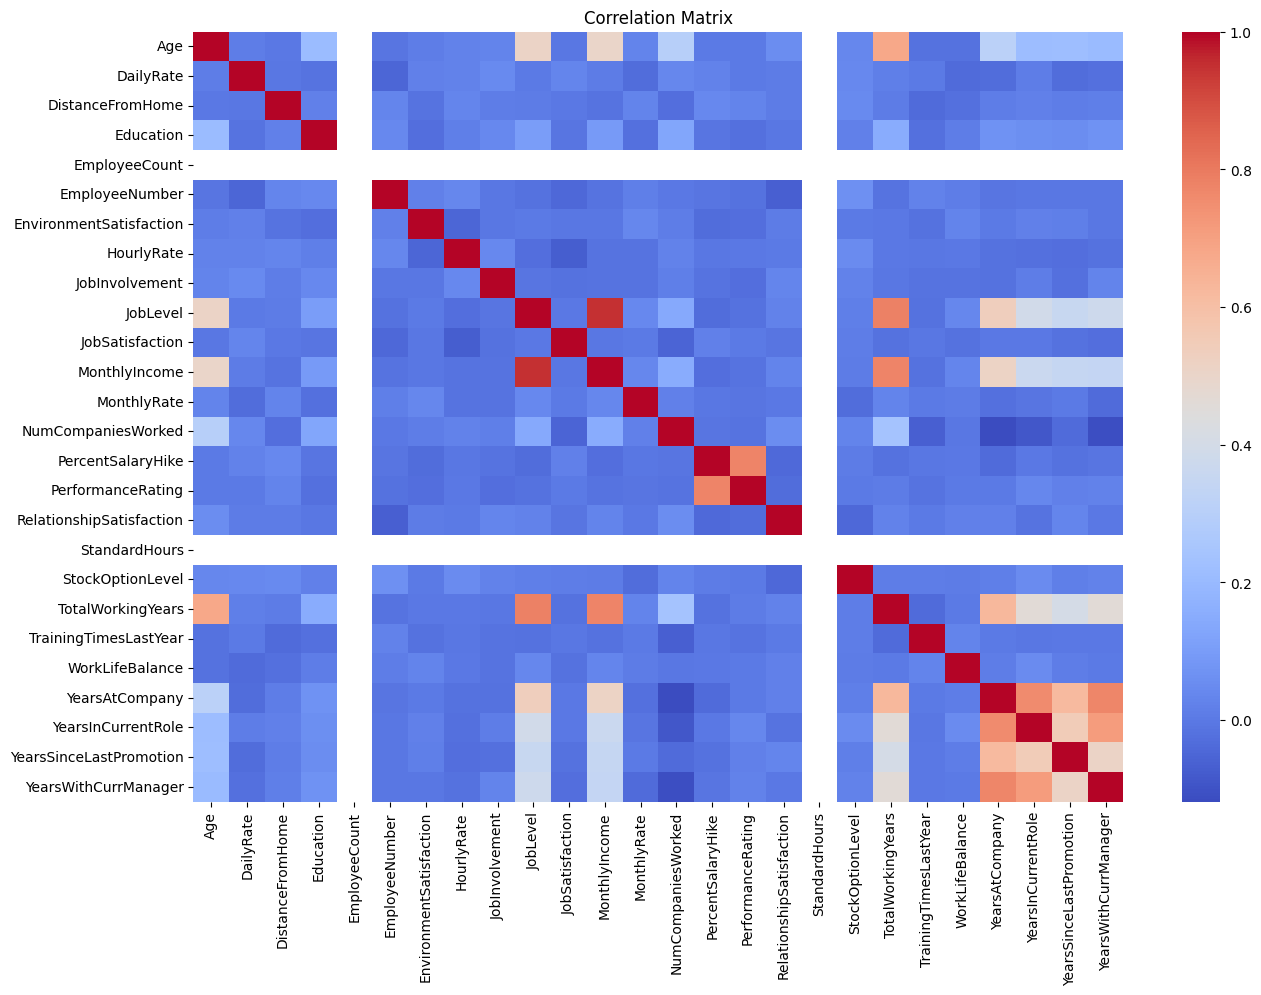

In [15]:


correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

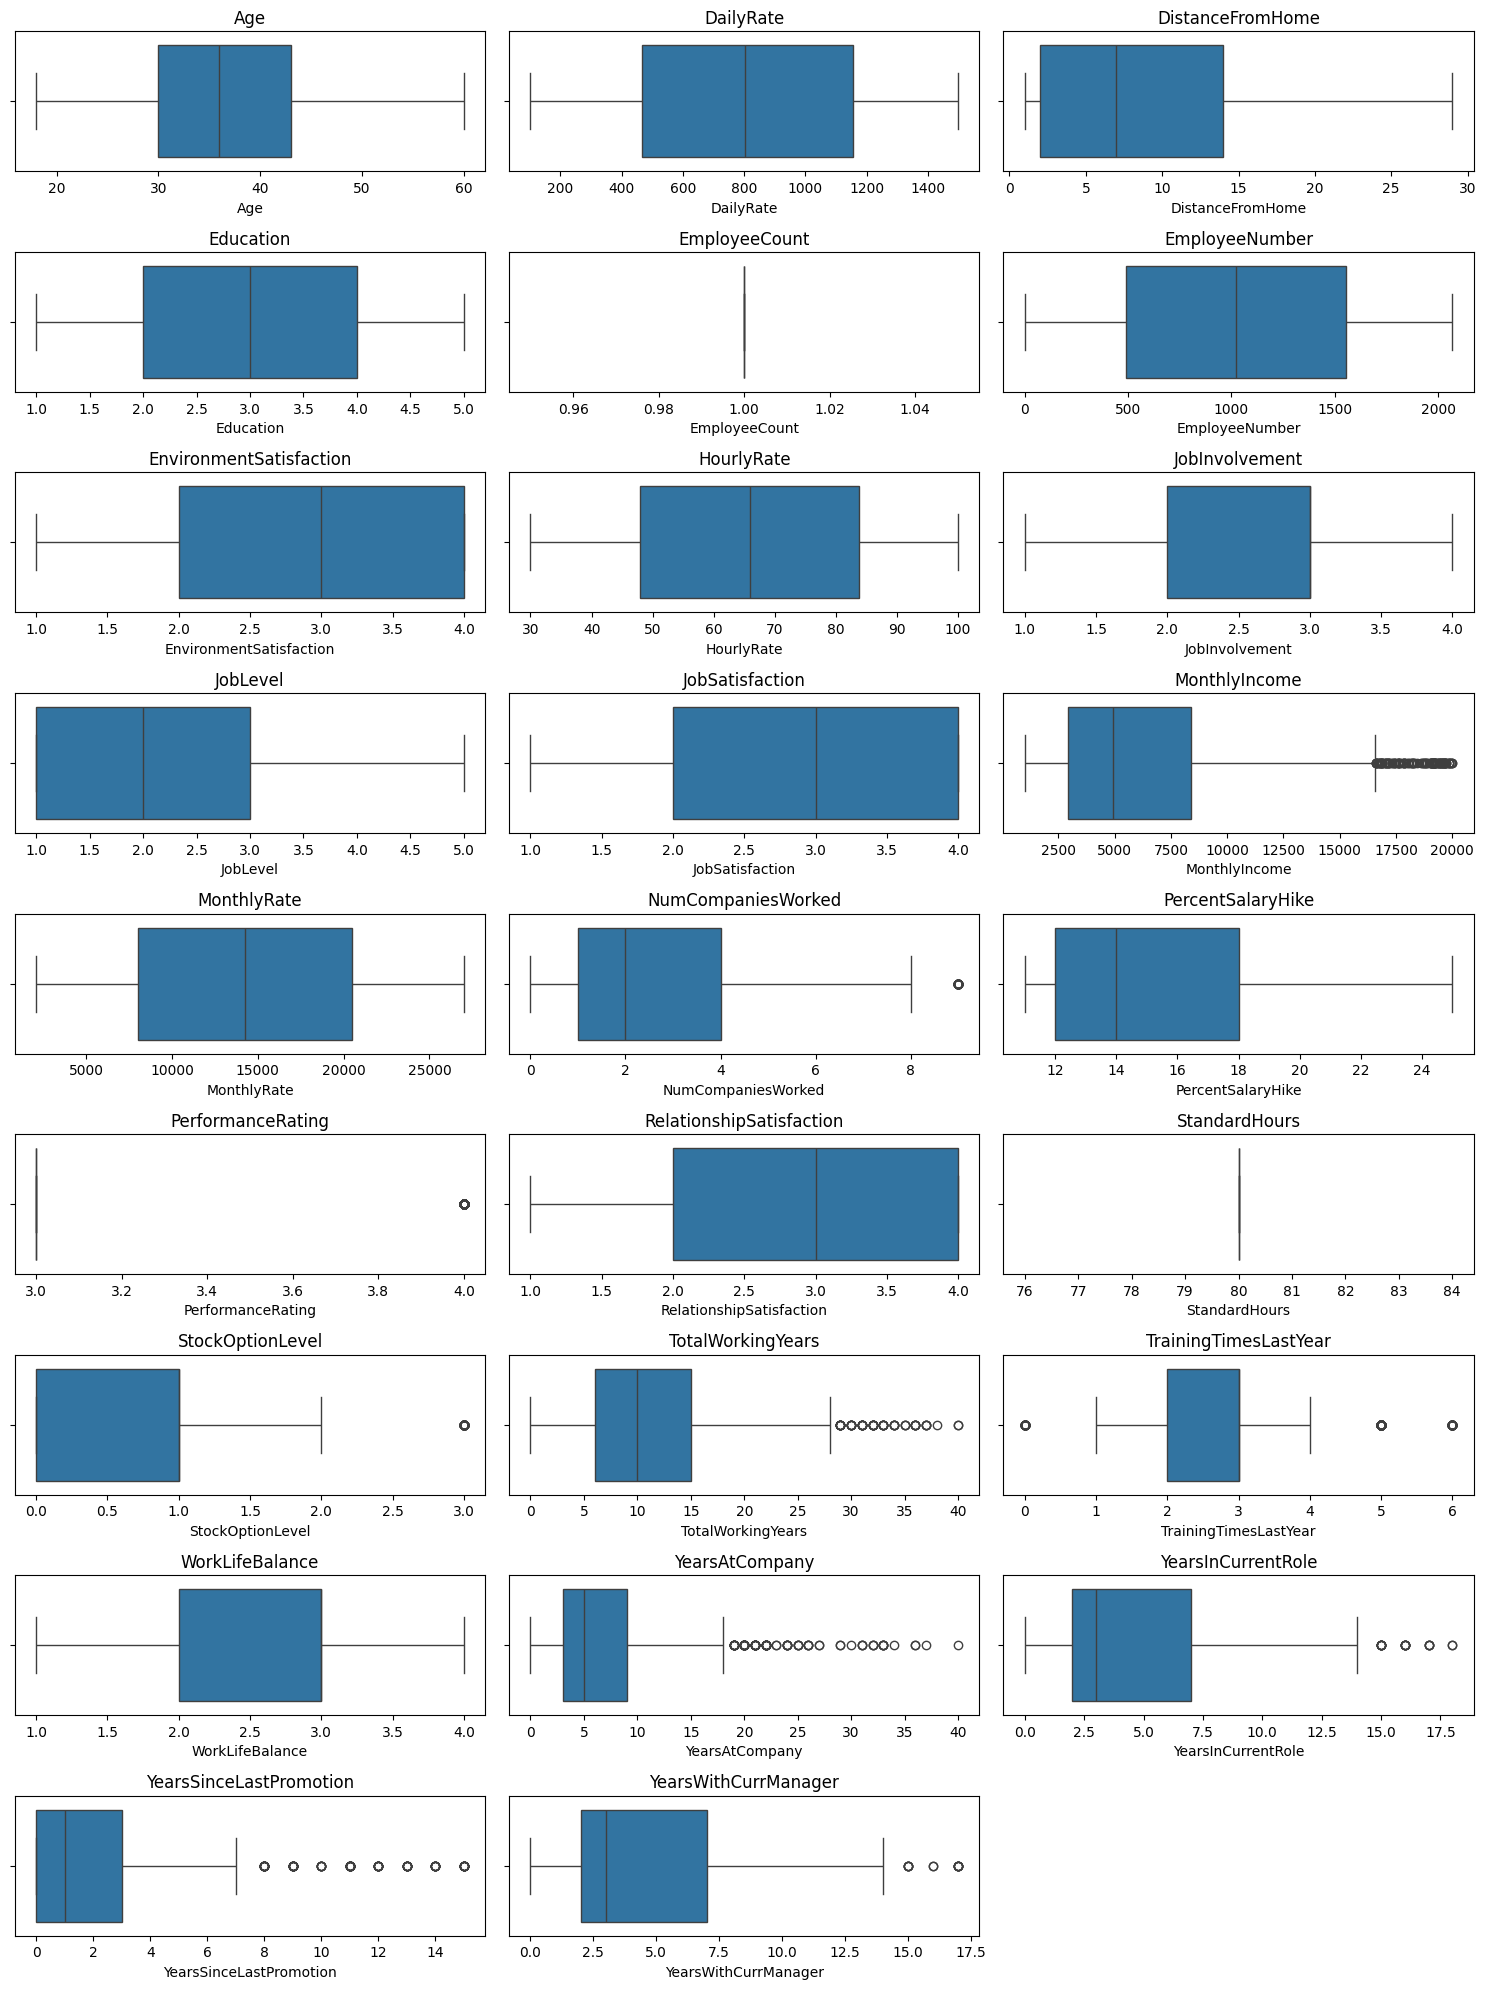

In [16]:

numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(15, 20))
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [17]:

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_cleaned


numerical_cols_for_outlier_removal = df.select_dtypes(include=np.number).columns
if 'Attrition' in numerical_cols_for_outlier_removal:
    numerical_cols_for_outlier_removal = numerical_cols_for_outlier_removal.drop('Attrition')

df_cleaned = df.copy()
for col in numerical_cols_for_outlier_removal:
    df_cleaned = remove_outliers_iqr(df_cleaned, col)

print(f"Shape of the original DataFrame: {df.shape}")
print(f"Shape of the DataFrame after outlier removal: {df_cleaned.shape}")

Shape of the original DataFrame: (1470, 35)
Shape of the DataFrame after outlier removal: (699, 35)


In [18]:
print("Shape of the DataFrame:", df.shape)
print("\nData types of each column:\n")
df.info()
print("\nMissing values in each column:\n", df.isnull().sum())

Shape of the DataFrame: (1470, 35)

Data types of each column:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement

In [19]:

df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})


columns_to_drop = ['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours']
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]
df.drop(existing_columns_to_drop, axis=1, inplace=True)


le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

In [20]:

le = LabelEncoder()
for col in df_cleaned.select_dtypes(include='object').columns:
    df_cleaned[col] = le.fit_transform(df_cleaned[col])

X = df_cleaned.drop('Attrition', axis=1)
y = df_cleaned['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]


Accuracy: 0.8642857142857143

Overall Precision: 0.8016208597603947
Overall Recall: 0.6537356321839081
Overall F1-score: 0.6897959183673469


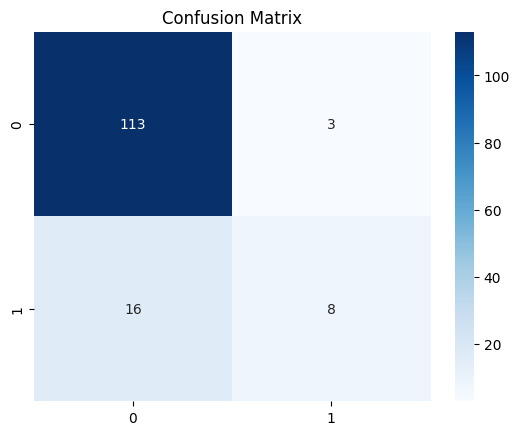

In [23]:
report = classification_report(y_test, y_pred, output_dict=True)

print("Accuracy:", report['accuracy'])
print("\nOverall Precision:", report['macro avg']['precision'])
print("Overall Recall:", report['macro avg']['recall'])
print("Overall F1-score:", report['macro avg']['f1-score'])


# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

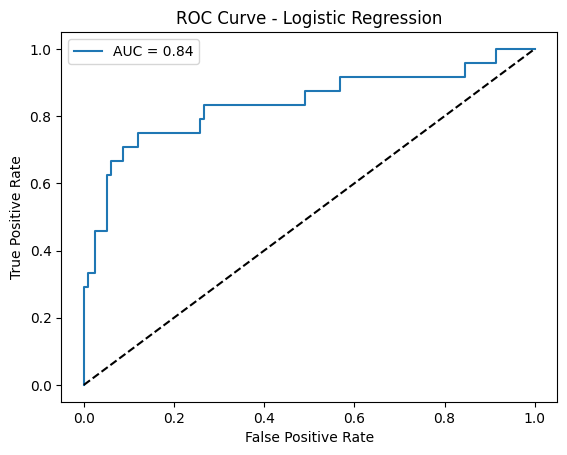

In [24]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()


In [25]:
importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_reg.coef_[0]
})
importance['Abs_Coeff'] = abs(importance['Coefficient'])
importance = importance.sort_values(by='Abs_Coeff', ascending=False)
importance.head(10)


,Feature,Coefficient,Abs_Coeff
26,StockOptionLevel,-0.776513,0.776513
21,OverTime,0.726382,0.726382
3,Department,0.539826,0.539826
9,EnvironmentSatisfaction,-0.478376,0.478376
27,TotalWorkingYears,-0.466132,0.466132
15,JobSatisfaction,-0.465840,0.465840
19,NumCompaniesWorked,0.437578,0.437578
17,MonthlyIncome,-0.432188,0.432188
24,RelationshipSatisfaction,-0.395708,0.395708
31,YearsInCurrentRole,-0.359898,0.359898


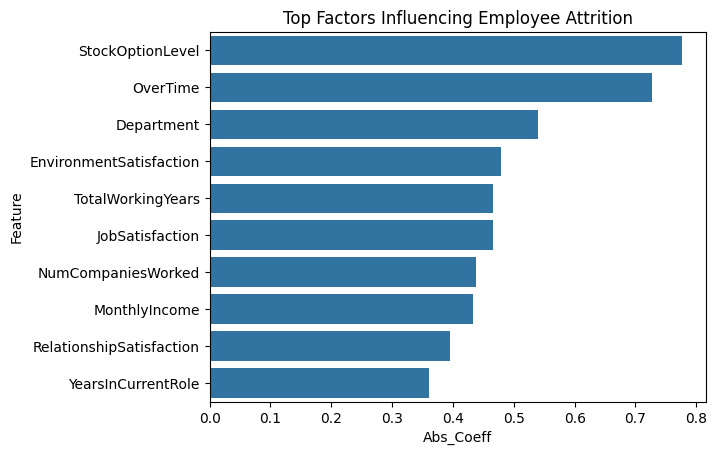

In [26]:
sns.barplot(x='Abs_Coeff', y='Feature', data=importance.head(10))
plt.title("Top Factors Influencing Employee Attrition")
plt.show()


In [27]:
import pickle

with open('logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(log_reg, f)

In [28]:

with open('logistic_regression_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)